In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [18]:
from sklearn.datasets import load_boston

In [24]:
df = load_boston()

In [27]:
df.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [47]:
#creating dataframe 
data = pd.DataFrame(data = df['data'], columns = df['feature_names'])

In [52]:
#adding housing value to the dataframe
data['Value'] = df['target']

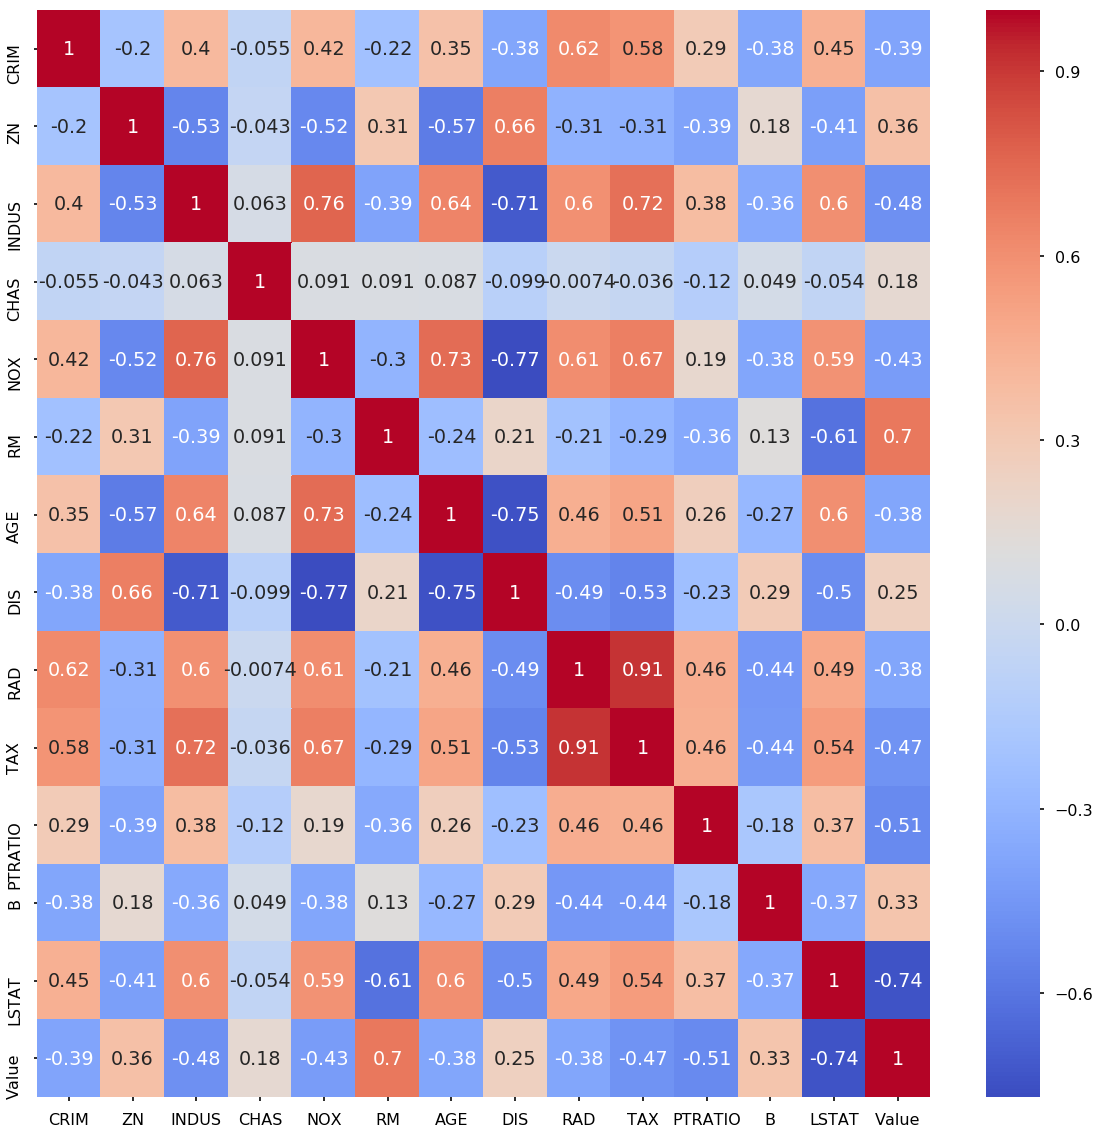

In [55]:
#creating heatmap
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')

C:\Users\csmid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\csmid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


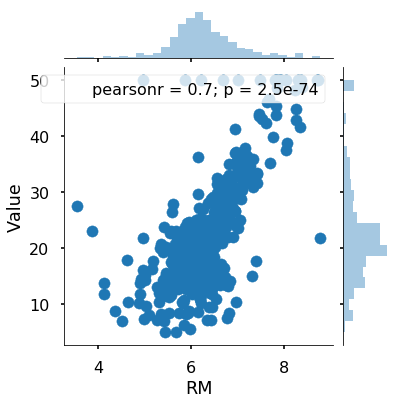

In [87]:
sns.jointplot('RM', 'Value', data = data)

C:\Users\csmid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\csmid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


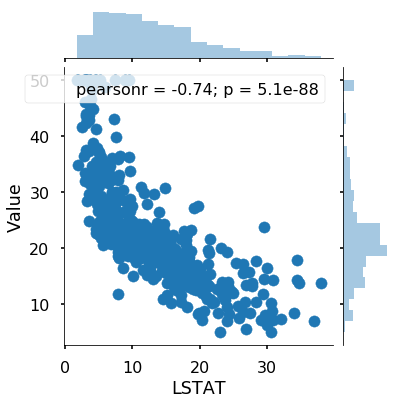

In [88]:
sns.jointplot('LSTAT', 'Value', data = data)

In [89]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Value'],
      dtype='object')

In [91]:
X = data[['RM', 'LSTAT']]
Y = data['Value']

In [94]:
from sklearn.model_selection import train_test_split

In [108]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = .7, random_state = 100)

In [109]:
from sklearn.linear_model import LinearRegression

In [110]:
lm = LinearRegression()

In [111]:
lm.fit(x_train, y_train)
predictions = lm.predict(x_test)

In [113]:
#metrics of the model
from sklearn import metrics
MSE = metrics.mean_squared_error(y_test, predictions)
RMSE = np.sqrt(MSE)
RS = metrics.explained_variance_score(y_test, predictions)
print('MSE:', MSE)
print('RMSE', RMSE)
print('R^2', RS)

MSE: 30.51199304673499
RMSE 5.523766201310026
R^2 0.6419422554258007


Text(0.5,1,'Residual Distribution')

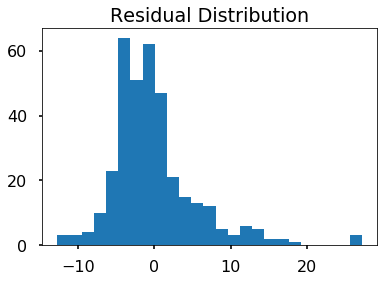

In [124]:
fig, ax = plt.subplots(1,1)
ax.hist(y_test - predictions, bins = 25)
ax.set_title('Residual Distribution')

In [131]:
coeff = lm.coef_
coeff_df = pd.DataFrame(data = coeff, index = X.columns, columns = ['Coeff'])
coeff_df

,Coeff
RM,4.433854
LSTAT,-0.652118


In [177]:
#F-stat
meanY = np.mean(data['Value'])
def TSS(x):
    a = (x - meanY)**2
    return a
TSS = sum(data['Value'].apply(lambda x: TSS(x)))

Yi = np.array(y_test)
Yhat = np.array(predictions)
RSS = sum((Yi-Yhat)**2)
RSS
Fstat = ((TSS-RSS)/2)/(RSS/(355-2-1))

In [179]:
Fstat

518.0764664568025